In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../..')

from src.config import DATA_DIR, AUX_DATA_FILES

df_bureau = pd.read_csv(DATA_DIR / AUX_DATA_FILES['bureau'])
df_bureau_balance = pd.read_csv(DATA_DIR / AUX_DATA_FILES['bureau_balance'])

print(f"Bureau shape: {df_bureau.shape}")
print(f"Bureau Balance shape: {df_bureau_balance.shape}")

Bureau shape: (1716428, 17)
Bureau Balance shape: (27299925, 3)


In [3]:
print("--- Bureau Info ---")
df_bureau.info(verbose=False)
print(f"Unique clients (SK_ID_CURR): {df_bureau['SK_ID_CURR'].nunique()}")
print(f"Unique previous credit scores (SK_ID_BUREAU): {df_bureau['SK_ID_BUREAU'].nunique()}")

--- Bureau Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Columns: 17 entries, SK_ID_CURR to AMT_ANNUITY
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
Уникальных клиентов (SK_ID_CURR): 305811
Уникальных предыдущих кредитов (SK_ID_BUREAU): 1716428


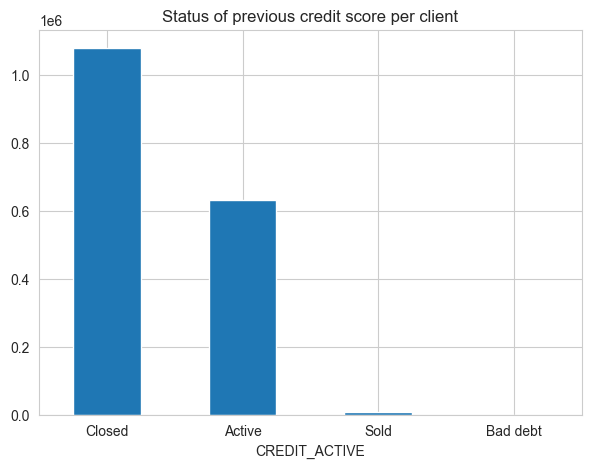


--- Example aggregating by status: ---
CREDIT_ACTIVE  Active  Bad debt  Closed  Sold
SK_ID_CURR                                   
100001              3         0       4     0
100002              2         0       6     0
100003              1         0       3     0
100004              0         0       2     0
100005              2         0       1     0


In [8]:
plt.figure(figsize=(7, 5))
df_bureau['CREDIT_ACTIVE'].value_counts().plot(kind='bar')
plt.title('Status of previous credit score per client')
plt.xticks(rotation=0)
plt.show()

active_count = df_bureau.groupby('SK_ID_CURR')['CREDIT_ACTIVE'].value_counts().unstack(fill_value=0)
print("\n--- Example aggregating by status: ---")
print(active_count.head())

/Users/ivan/ML/credit/venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


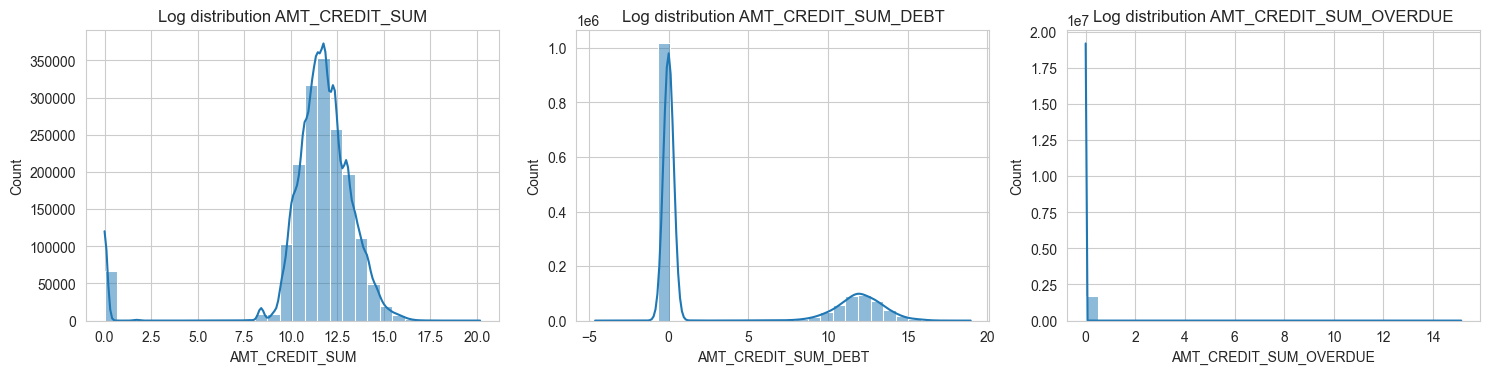

In [10]:
# посмотрим на сумму кредита и просрочки
cols_to_plot = ['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE']

plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 3, i + 1)
    # используем log1p, так как суммы сильно перекошены
    sns.histplot(np.log1p(df_bureau[col].dropna()), bins=30, kde=True)
    plt.title(f'Log distribution {col}')
plt.tight_layout()
plt.show()


In [14]:
print("\n--- Bureau Balance Info ---")
df_bureau_balance.info(verbose=False)
print(f"\n Unique credits (SK_ID_BUREAU): {df_bureau_balance['SK_ID_BUREAU'].nunique()}")


--- Bureau Balance Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Columns: 3 entries, SK_ID_BUREAU to STATUS
dtypes: int64(2), object(1)
memory usage: 624.8+ MB

 Unique credits (SK_ID_BUREAU): 817395


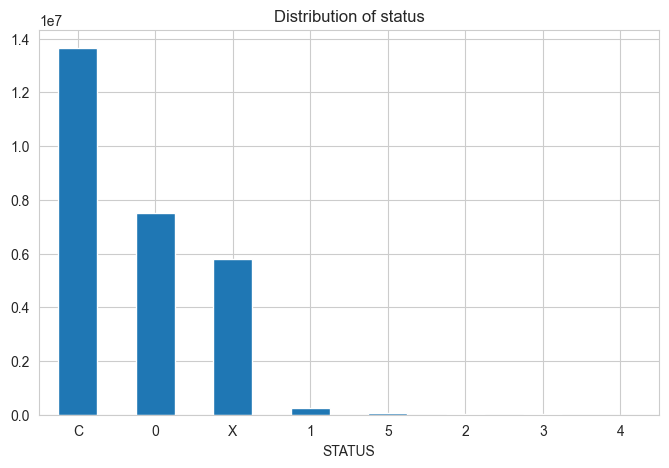


--- Доля статусов просрочки по кредитам (пример): ---
STATUS               0    1    2    3    4    5         C         X
SK_ID_BUREAU                                                       
5001709       0.000000  0.0  0.0  0.0  0.0  0.0  0.886598  0.113402
5001710       0.060241  0.0  0.0  0.0  0.0  0.0  0.578313  0.361446
5001711       0.750000  0.0  0.0  0.0  0.0  0.0  0.000000  0.250000
5001712       0.526316  0.0  0.0  0.0  0.0  0.0  0.473684  0.000000
5001713       0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  1.000000


In [16]:
plt.figure(figsize=(8, 5))
df_bureau_balance['STATUS'].value_counts().plot(kind='bar')
plt.title('Distribution of status')
plt.xticks(rotation=0)
plt.show()

status_counts = df_bureau_balance.groupby('SK_ID_BUREAU')['STATUS'].value_counts(normalize=True).unstack(fill_value=0)
print("\n--- Доля статусов просрочки по кредитам (пример): ---")
print(status_counts.head())

# колонки '0', '1', '2', 'C', 'X'